# README
- This notebook is for testing your own audio files!

# Connect Google Drive and Get Files

In [1]:
# ----- Google Colab directory and runtime -----
from google.colab import drive
drive.mount('/content/drive')
root_dir = '/content/drive/MyDrive/'

Mounted at /content/drive


## Finding Files
- Place the files in the Demo directory shown below
- Check if your audio file extension is in the list below

In [15]:
# Process demo files
dir_demo = root_dir + 'Voice_Cloning_Detection/Demo'

# Define valid file extensions
valid_extensions = ['.wav', '.m4a', '.mp3']  # Add more extensions if needed

In [40]:
# Check files
import os
files = [os.path.join(dir_demo, f) for f in os.listdir(dir_demo) if any(f.endswith(ext) for ext in valid_extensions)]
print("Number of Files: ", len(files))

# Create dictionary
#demo = {files[0], files[1]}

# Create dictionary with file paths as keys
demo = {file_path: os.path.basename(file_path) for file_path in files}
print("Demo set:", demo)

Number of Files:  2
Demo set: {'/content/drive/MyDrive/Voice_Cloning_Detection/Demo/Target.wav': 'Target.wav', '/content/drive/MyDrive/Voice_Cloning_Detection/Demo/Shuang.m4a': 'Shuang.m4a'}


# Filtered Function - Limit Histograms under 4 kHz

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

# Function to plot spectrogram
def plot_spectrogram(audio, sr, title):
    plt.figure(figsize=(10, 4))
    spectrogram = librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max), sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.tight_layout()
    plt.show()
    #plt.close()



In [42]:
import numpy as np
import scipy.signal
import scipy.io.wavfile

def filter(audio_data, cutoff_frequency, sr):
    # Define the filter
    nyquist_frequency = sr / 2
    cutoff_normalized = cutoff_frequency / nyquist_frequency
    b, a = scipy.signal.butter(4, cutoff_normalized, btype='low')

    # Apply the filter to each channel
    filtered_audio = np.apply_along_axis(lambda x: scipy.signal.filtfilt(b, a, x), axis=0, arr=audio_data)

    return filtered_audio

# Load the original audio file
#sampling_rate, audio_data = scipy.io.wavfile.read(file_path)


In [43]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
def compute_histogram_filtered(file_path, dir):
    # Load audio file
    audio, sr = librosa.load(file_path, sr=44100)
    # Plot spectrogram of original audio
    plot_spectrogram(audio, 44100, title='Original Audio Spectrogram')


    cutoff_frequency = 4000
    filtered_audio = filter(audio, cutoff_frequency, sr=44100)
    # Plot spectrogram of filtered audio
    plot_spectrogram(filtered_audio, 44100, title='Filtered Audio Spectrogram')
    # Calculate histogram of audio
    hist, bins = np.histogram(filtered_audio, bins=256, range=(-1, 1)) # 2^8 bins

    # Plot histogram
    plt.figure()
    plt.bar(bins[:-1], hist, width=(bins[1] - bins[0]), color='black')
    #plt.title('Histogram of Audio')
    #plt.xlabel('Amplitude')
    #plt.ylabel('Frequency')
    filename = os.path.basename(file_path)
    plt.savefig(os.path.join(dir, f'hist_{filename}.png'))
    plt.show()
    #plt.close()
    #print(hist.shape)
    #print(hist.dtype)
    return hist

# Get Filtered Histograms

--------------------------------------------------------------------------------------
Computing histogram: Target.wav


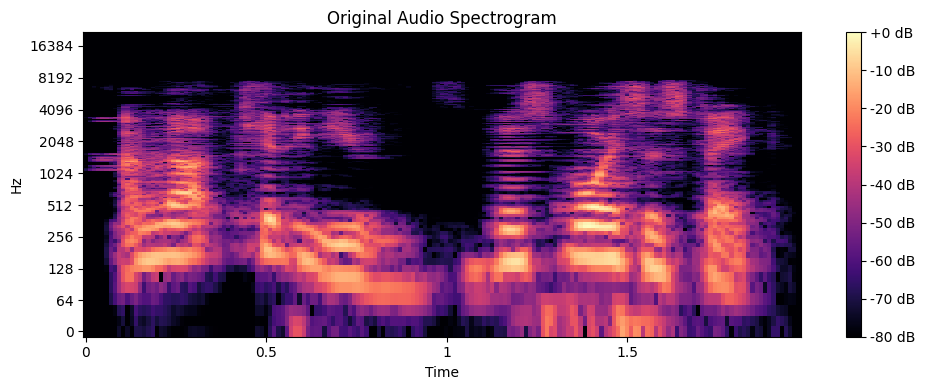

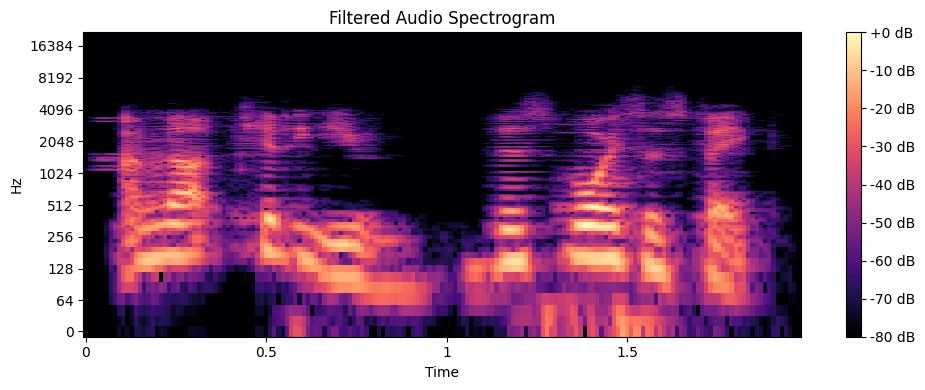

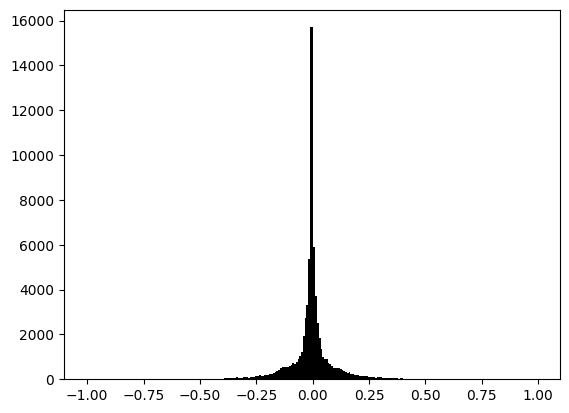

--------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------
Computing histogram: Shuang.m4a


<ipython-input-43-f90a9154a274>:8: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=44100)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


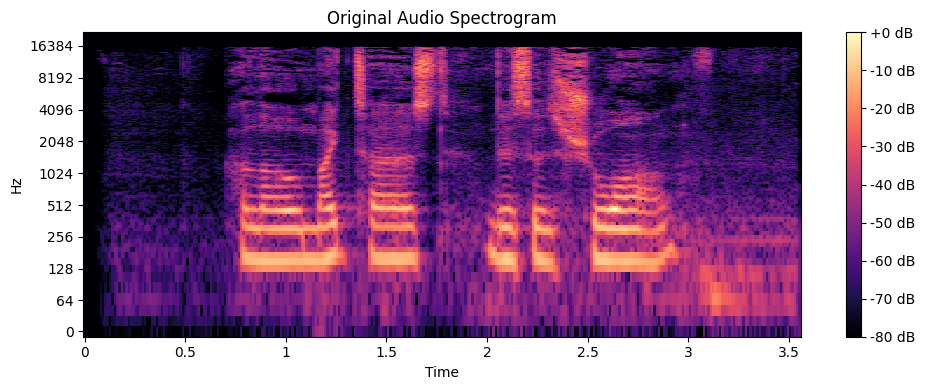

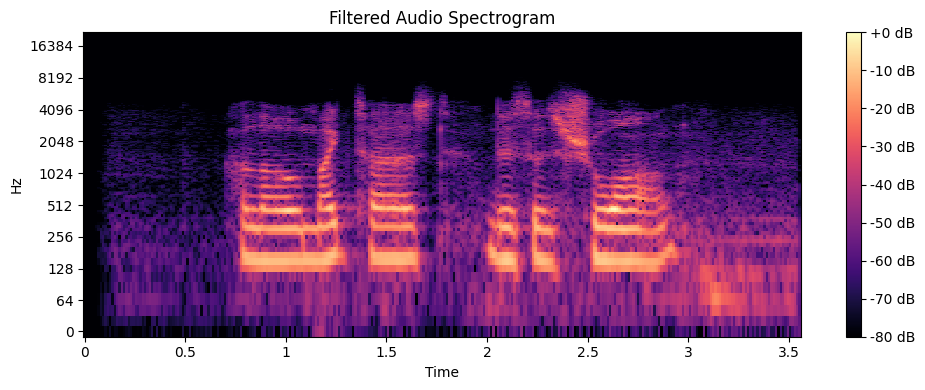

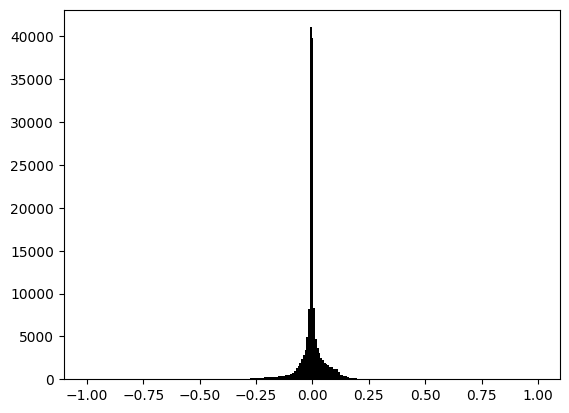

--------------------------------------------------------------------------------------



In [50]:
# Iterate over items in the demo dictionary
for file_path, file_name in demo.items():
    print("--------------------------------------------------------------------------------------")
    print("Computing histogram:", file_name)
    compute_histogram_filtered(file_path, root_dir + "Voice_Cloning_Detection/Demo")
    print("--------------------------------------------------------------------------------------")
    print("")

# Predict
- Loading our best performing, generalized model (Our-HVoice_SiF-Filtered)

In [51]:
from tensorflow.keras.models import load_model

# ---------- Load our saved model ---------- #
model_path = root_dir + 'Voice_Cloning_Detection/Models/Deep4SNet-Our-HVoice_SiF-Filtered.keras'
model_our_HVoice_SiF_Filtered = load_model(model_path)

In [52]:
from PIL import Image
import numpy as np

# Load the image files
image_paths = [
    '/content/drive/MyDrive/Voice_Cloning_Detection/Demo/hist_Shuang.m4a.png',
    '/content/drive/MyDrive/Voice_Cloning_Detection/Demo/hist_Target.wav.png'
]

# Resize images to match the input shape of the model
resized_images = []
for image_path in image_paths:
    # Load image
    image = Image.open(image_path)
    # Convert image to RGB (remove alpha channel if exists)
    image = image.convert('RGB')
    # Resize image to match the input shape of the model (150x150)
    resized_image = image.resize((150, 150))
    # Convert image to numpy array
    image_array = np.array(resized_image)
    # Append resized image to list
    resized_images.append(image_array)

# Convert list of resized images to numpy array
resized_images = np.array(resized_images)

# Use the loaded model to predict classes
predictions = model_our_HVoice_SiF_Filtered.predict(resized_images)

# Output predictions
class_labels = ['fake', 'real']
for i, prediction in enumerate(predictions):
    predicted_class_label = class_labels[int(prediction[0])]
    print(f'{image_paths[i]} --- Predict: {predicted_class_label}')

1/1 [==============================] - 2s 2s/step
/content/drive/MyDrive/Voice_Cloning_Detection/Demo/hist_Shuang.m4a.png --- Predict: real
/content/drive/MyDrive/Voice_Cloning_Detection/Demo/hist_Target.wav.png --- Predict: fake
